In [ ]:
# -*- coding: utf-8 -*-
"""
Author: Mayank Kunwar
Find Me: https://in.linkedin.com/in/mayankkunwar93
"""

**Random transformation matrices**

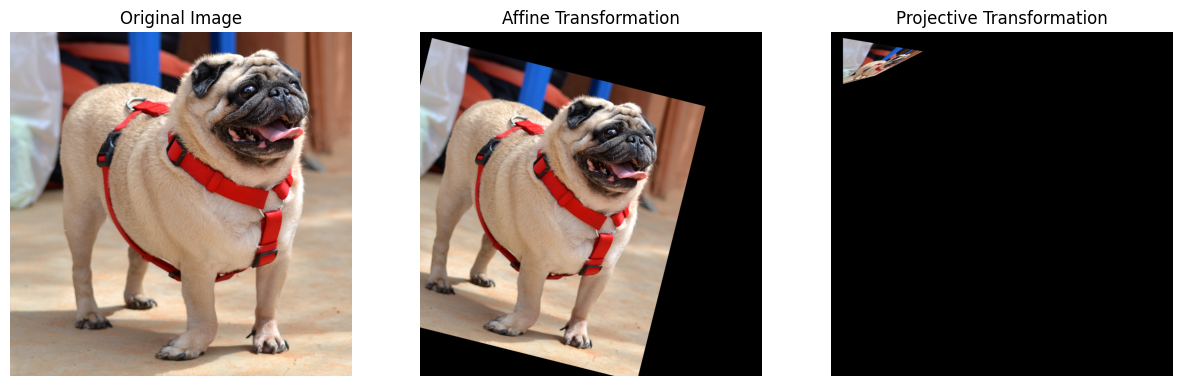

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/test_image_2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Define the affine transformation matrix
# Example: translation + scaling + rotation
affine_matrix = np.array([
    [0.8, -0.2, 100],
    [0.2, 0.8, 50],
    [0, 0, 1]
], dtype=np.float32)

# Define the projective (homography) transformation matrix
# Example: projective transformation
projective_matrix = np.array([
    [1, 0.2, 100],
    [0.2, 1, 50],
    [0.001, 0.002, 1]
], dtype=np.float32)

# Get the image dimensions
height, width = image.shape[:2]

# Apply the affine transformation
affine_transformed_image = cv2.warpAffine(image, affine_matrix[:2, :], (width, height))

# Apply the projective transformation
projective_transformed_image = cv2.warpPerspective(image, projective_matrix, (width, height))

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(affine_transformed_image)
axs[1].set_title('Affine Transformation')
axs[1].axis('off')

axs[2].imshow(projective_transformed_image)
axs[2].set_title('Projective Transformation')
axs[2].axis('off')

plt.show()


**Calculating transformation matrices**

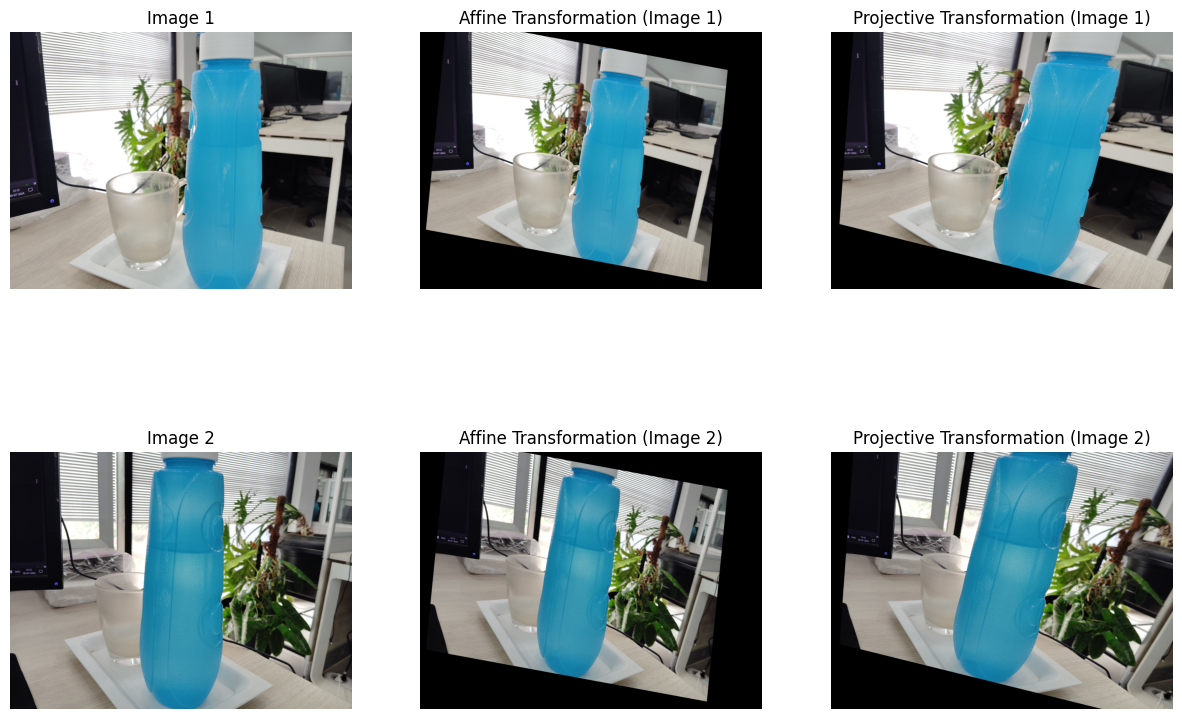

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('/content/test_01.jpg')
image2 = cv2.imread('/content/test_02.jpg')

# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Detect ORB keypoints and descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# Match descriptors using FLANN
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

# Estimate the affine transformation matrix
affine_matrix, _ = cv2.estimateAffine2D(pts1, pts2)

# Apply the affine transformation to image1
height, width = image2.shape[:2]
aligned_image1_affine = cv2.warpAffine(image1, affine_matrix, (width, height))

# Estimate the projective transformation matrix
projective_matrix, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC)

# Apply the projective transformation to image1
aligned_image1_projective = cv2.warpPerspective(image1, projective_matrix, (width, height))

# Apply the same affine and projective transformations to image2
aligned_image2_affine = cv2.warpAffine(image2, affine_matrix, (width, height))
aligned_image2_projective = cv2.warpPerspective(image2, projective_matrix, (width, height))

# Plot the results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# First row: image1, Affine Transformation, Projective Transformation
axs[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Image 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(aligned_image1_affine, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Affine Transformation (Image 1)')
axs[0, 1].axis('off')

axs[0, 2].imshow(cv2.cvtColor(aligned_image1_projective, cv2.COLOR_BGR2RGB))
axs[0, 2].set_title('Projective Transformation (Image 1)')
axs[0, 2].axis('off')

# Second row: image2, Affine Transformation for image2, Projective Transformation for image2
axs[1, 0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Image 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(cv2.cvtColor(aligned_image2_affine, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Affine Transformation (Image 2)')
axs[1, 1].axis('off')

axs[1, 2].imshow(cv2.cvtColor(aligned_image2_projective, cv2.COLOR_BGR2RGB))
axs[1, 2].set_title('Projective Transformation (Image 2)')
axs[1, 2].axis('off')

plt.show()
